<a href="https://www.kaggle.com/code/patimejia/dnn-diagnostics-activations-gradients?scriptVersionId=138079448" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

---

> #### **Goal**: This code is designed for analysis of deep neural networks. Through visualizing activations, weights, and gradients, we identify issues stemming from activation functions. Much like the length of a pendulum determines its swing frequency, (i.e. $\frac{1}{t_{j-i}}$ hertz), activation functions shape a network's reaction to data.

---
# Deep Neural Networks: Addressing the Gradient Problem

Deep neural networks are powerful tools in machine learning. However, training them can present challenges. One notable challenge is the vanishing and exploding gradient problem during backpropagation. The choice of activation functions can significantly influence these issues.

## Activation Functions

Activation functions introduce non-linearity into the network, enabling it to learn from the error and make adjustments, which is essential for learning complex patterns.

### 1. Sigmoid
 $$f(x) = \frac{1}{1 + e^{-x}} $$
- **Range**: [0, 1]
- **Challenge**: Can lead to vanishing gradients in deep networks due to its saturation for large positive or negative inputs.
- **Gradient**: 
 $\frac{\partial f(x)}{\partial x} = f(x)(1 - f(x)) $

### 2. ReLU (Rectified Linear Unit)
$$ f(x) = \max(0, x) $$
- **Range**: $[0, \infty)$
- **Benefit**: Mitigates the vanishing gradient problem.
- **Challenge**: Can lead to exploding gradients if not carefully initialized or regularized.

### 3. Leaky ReLU
$$f(x) = 
\begin{cases} 
x & \text{if } x > 0 \\
\alpha x & \text{otherwise}
\end{cases} 
$$
- **Range**: $(- \infty, \infty)$
- **Benefit**: Addresses the "dying ReLU" problem where neurons never activate.
- **Parameter**: $\alpha$ is a small positive constant (e.g., $0.01$).

### 4. Tanh
$$ f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $$
- **Range**: $[-1, 1]$
- **Note**: It's a scaled and shifted version of the sigmoid function. In fact, it scales the sigmoid's output by 2 and shifts it down by 1.

### 5. Arctangent
$$ f(x) = \arctan(x) $$
- **Range**: $[- \frac{\pi}{2}, \frac{\pi}{2}]$

## Gradient Dynamics

- **Vanishing Gradient**: Occurs when gradients approach zero, stalling the training process. Often observed with activation functions that squash their inputs into a small range, especially when inputs are large.

- **Exploding Gradient**: Occurs when gradients grow too large, causing divergent behavior. This can be due to deep networks, large parameter values, or particular activation functions.

## Mitigating Strategies

1. **Proper Initialization**: Initialize weights in a manner that neither amplifies nor diminishes gradients during backpropagation.
2. **Shortcuts/Residual connections**: Used in architectures like ResNets, these allow gradients to skip layers and mitigate the vanishing gradient issue.
3. **Gradient Clipping**: A technique to prevent gradients from exceeding a threshold and thus prevent the exploding gradient problem.

## Diagnostic Code

The code provided is a tool designed to help visualize the behavior of different activation functions in deep neural networks. By examining activations, weights, and gradients, we can gain insight into and potentially address the challenges associated with them.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l


[LEAKY_RELU] Extracting neuron activations (outputs) for input data [[ 1. ]
 [ 0.5]
 [-1. ]
 [-0.5]]. This helps us understand how data flows through the network.

[LEAKY_RELU] Retrieving the learned weights from the model. These weights represent the strength of connections between neurons.

[LEAKY_RELU] Computing gradients to understand how much the error will change if the weights are adjusted. This is crucial for learning.

[LEAKY_RELU] Retrieving the learned weights from the model. These weights represent the strength of connections between neurons.

[LEAKY_RELU] Computing gradients to understand how much the error will change if the weights are adjusted. This is crucial for learning.

[LEAKY_RELU] Retrieving the learned weights from the model. These weights represent the strength of connections between neurons.

[LEAKY_RELU] Checking for potential gradient issues like vanishing or exploding gradients which can hinder learning.
[Warning] leaky_relu has potential vanishing gradien

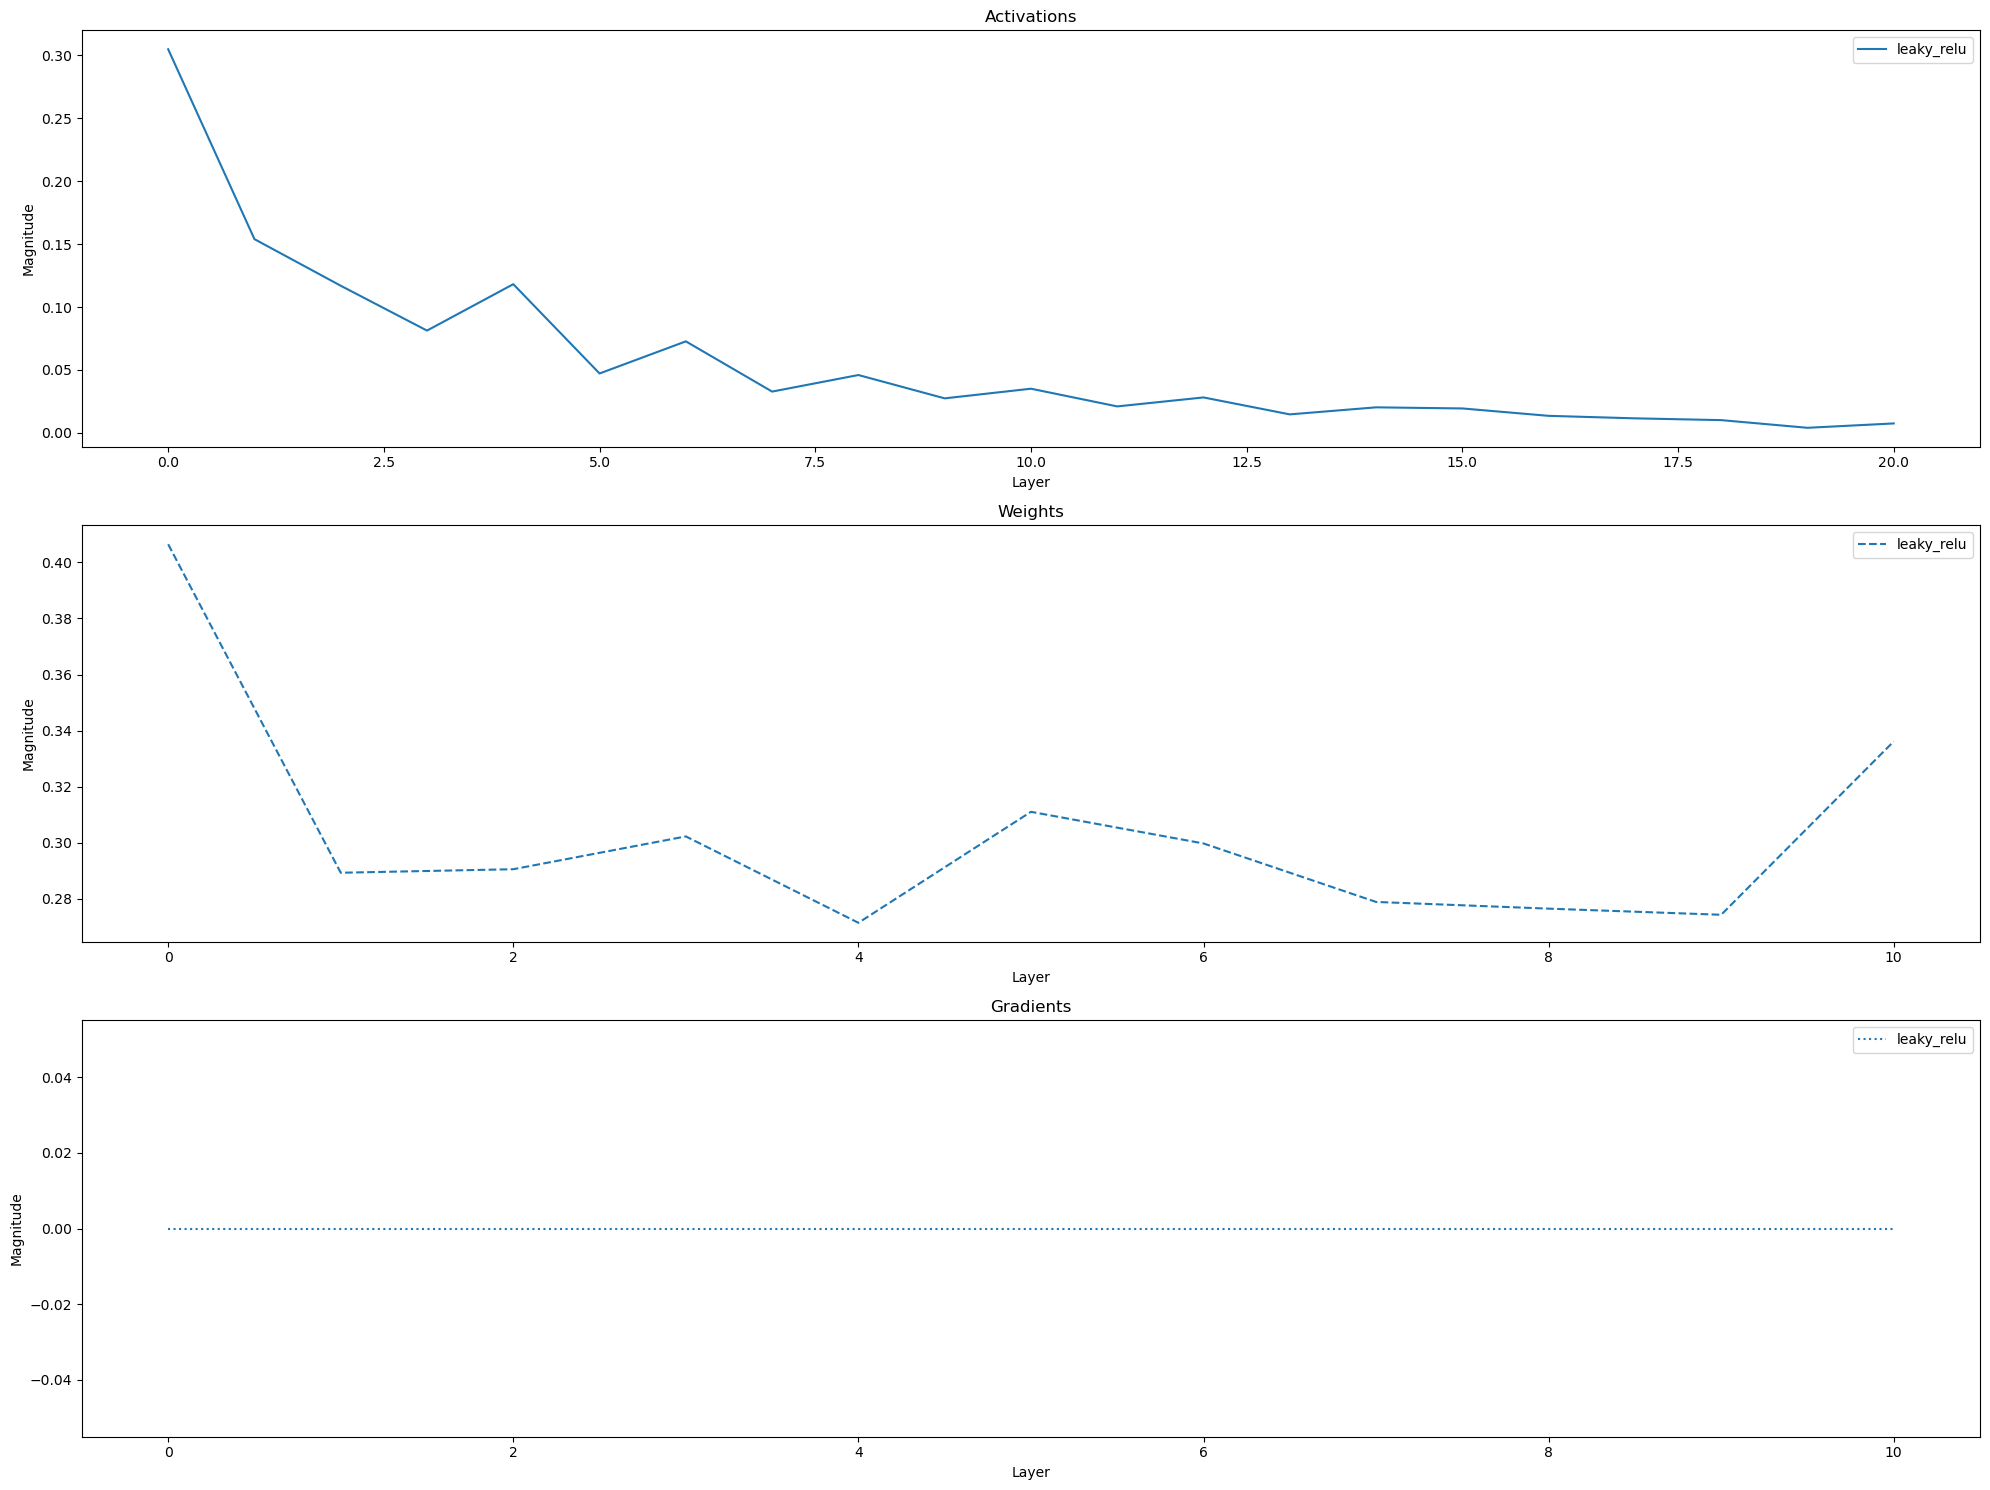


[SIGMOID] Extracting neuron activations (outputs) for input data [[ 1. ]
 [ 0.5]
 [-1. ]
 [-0.5]]. This helps us understand how data flows through the network.

[RELU] Extracting neuron activations (outputs) for input data [[ 1. ]
 [ 0.5]
 [-1. ]
 [-0.5]]. This helps us understand how data flows through the network.

[TANH] Extracting neuron activations (outputs) for input data [[ 1. ]
 [ 0.5]
 [-1. ]
 [-0.5]]. This helps us understand how data flows through the network.

[SIGMOID] Retrieving the learned weights from the model. These weights represent the strength of connections between neurons.

[RELU] Retrieving the learned weights from the model. These weights represent the strength of connections between neurons.

[TANH] Retrieving the learned weights from the model. These weights represent the strength of connections between neurons.

[SIGMOID] Computing gradients to understand how much the error will change if the weights are adjusted. This is crucial for learning.

[SIGMOID] Re

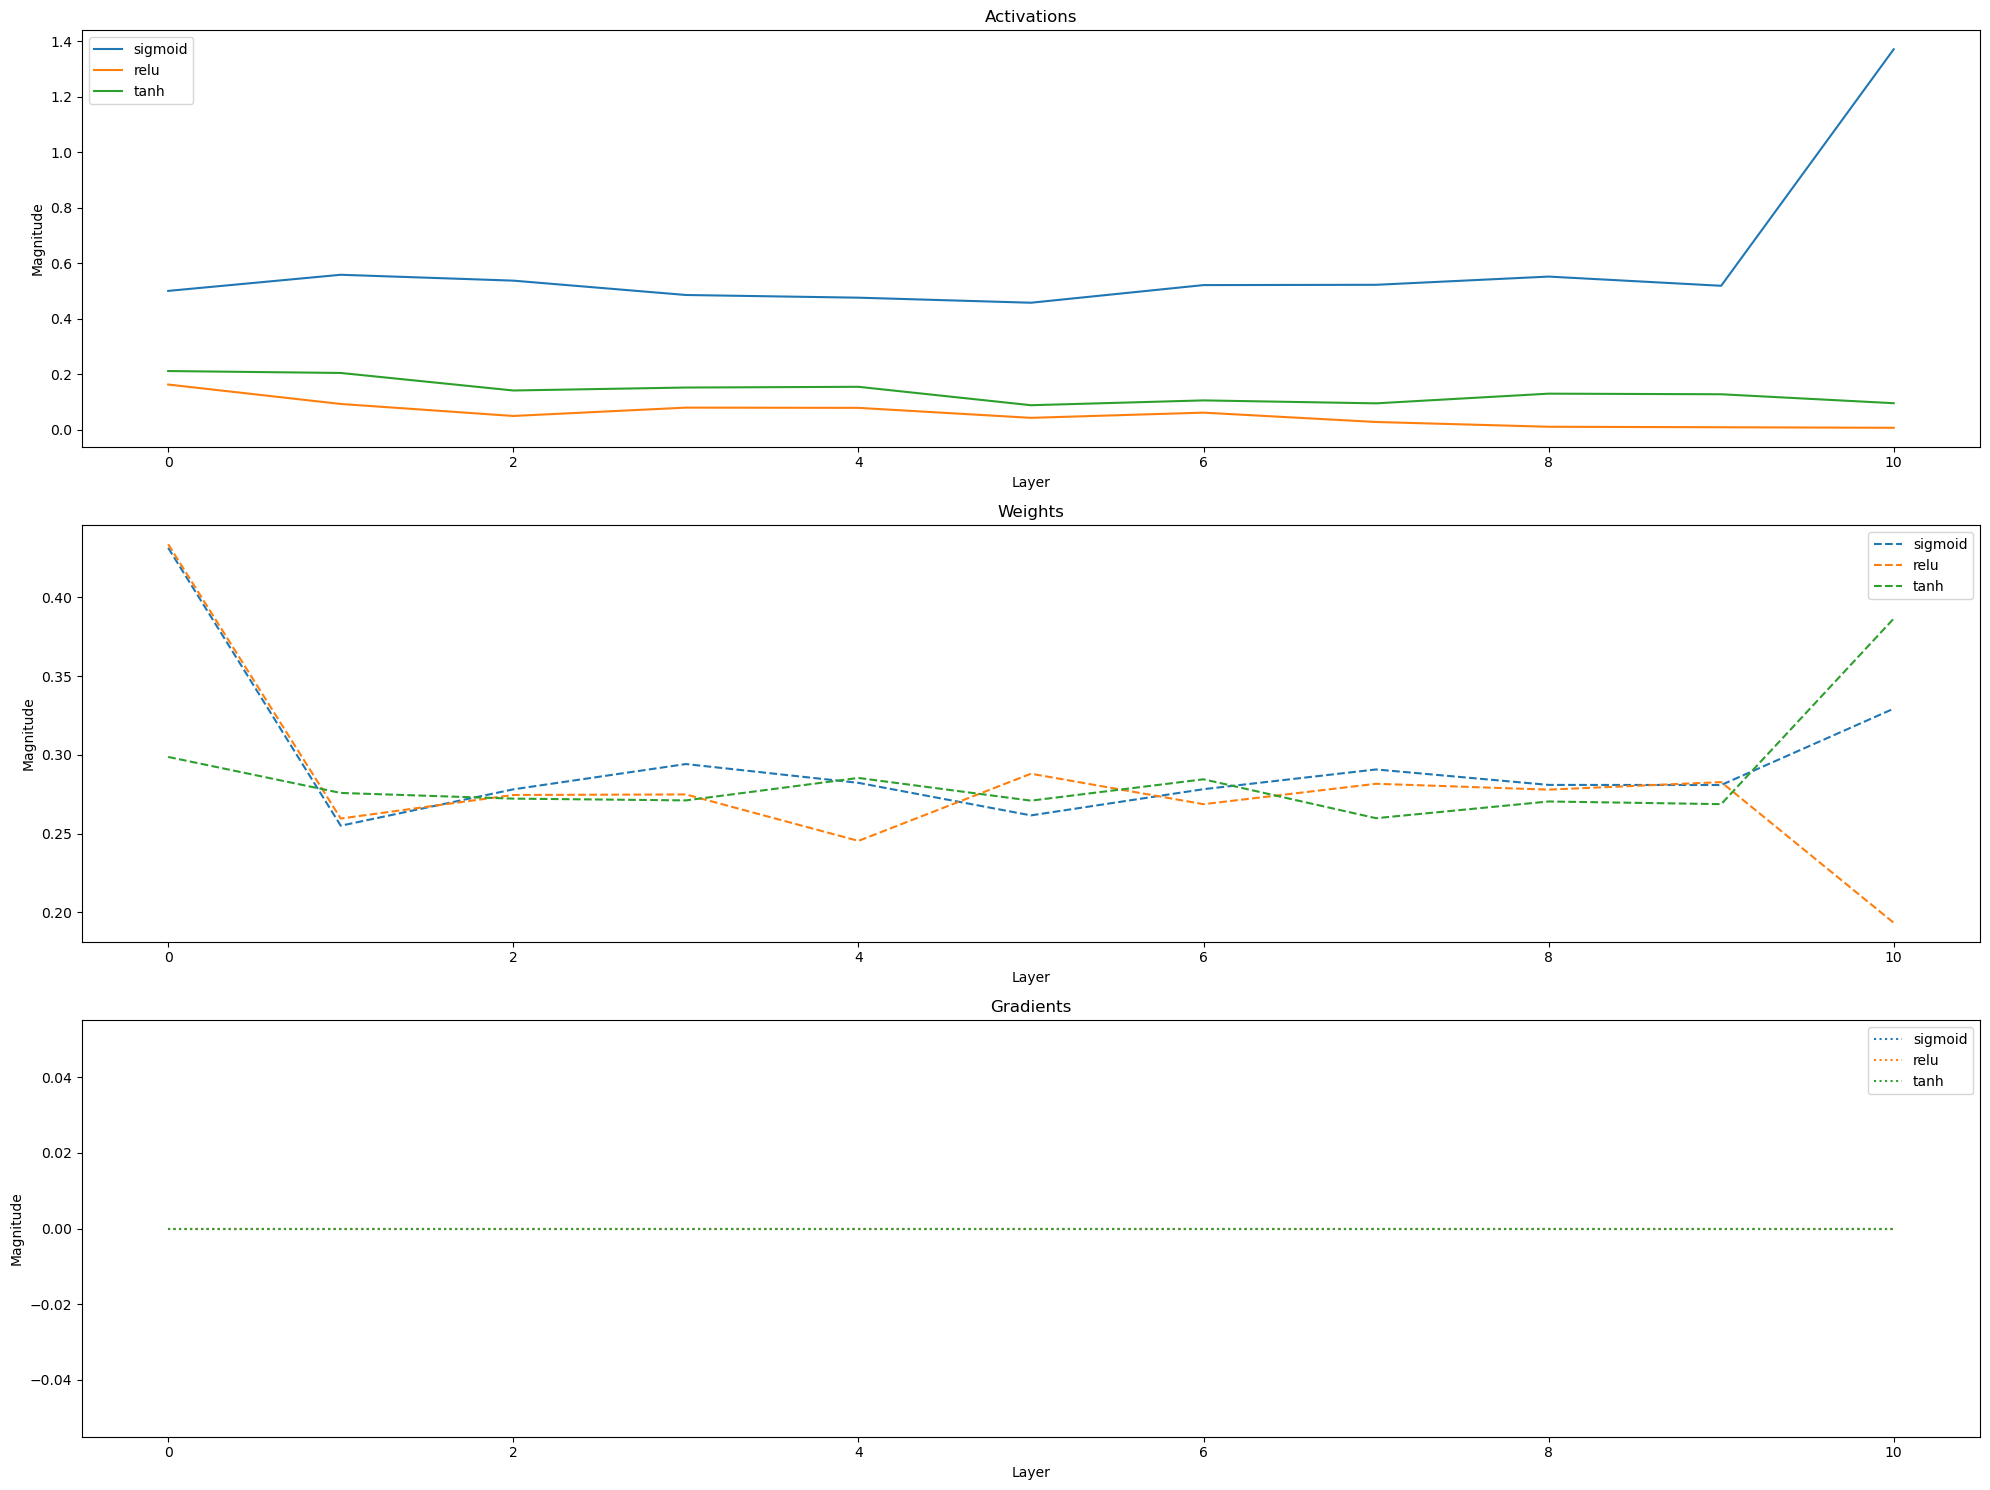

In [1]:
import os
import warnings
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, LeakyReLU

# Suppress TensorFlow logs and Python warnings for clearer output
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings("ignore")

def create_network(activation, layers, units, output_units):
    """ Create a neural network model based on the given activation function."""
    model = tf.keras.Sequential()
    
    for _ in range(layers):
        if activation == 'leaky_relu':
            model.add(Dense(units))
            model.add(LeakyReLU(alpha=0.01))
        else:
            model.add(Dense(units, activation=activation))
            
    model.add(Dense(output_units))
    model.build(input_shape=(None, 1))
    return model

def get_activations_for_model(model, data, activation_type):
    """Extract activations for the given data."""
    print(f"\n[{activation_type.upper()}] Extracting neuron activations (outputs) for input data {data.numpy()}. This helps us understand how data flows through the network.")
    return [tf.keras.Model(inputs=model.input, outputs=layer.output).predict(data, verbose=0) for layer in model.layers]

def get_weights_for_model(model, activation_type):
    """Extract weights from the model."""
    print(f"\n[{activation_type.upper()}] Retrieving the learned weights from the model. These weights represent the strength of connections between neurons.")
    return [layer.get_weights()[0] for layer in model.layers if layer.get_weights()]

def compute_gradients(model, data, activation_type):
    """Compute gradients for the given data."""
    print(f"\n[{activation_type.upper()}] Computing gradients to understand how much the error will change if the weights are adjusted. This is crucial for learning.")
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(data)
        predictions = model(data)
    
    gradient_input = tape.gradient(predictions, data).numpy()
    weights_tf = [tf.convert_to_tensor(weight) for weight in get_weights_for_model(model, activation_type)]
    gradient_weights = [tape.gradient(predictions, weight).numpy() if tape.gradient(predictions, weight) else np.zeros_like(weight.numpy()) for weight in weights_tf]
    del tape
    return gradient_input, gradient_weights

def identify_gradient_issues(gradient_weights, activation_type):
    """Identify potential gradient issues."""
    print(f"\n[{activation_type.upper()}] Checking for potential gradient issues like vanishing or exploding gradients which can hinder learning.")
    gradient_issues = {"vanishing": [], "exploding": []}
    for idx, gradient in enumerate(gradient_weights):
        if np.linalg.norm(gradient) < 1e-5:
            gradient_issues["vanishing"].append(idx)
        elif np.linalg.norm(gradient) > 1e3:
            gradient_issues["exploding"].append(idx)
    return gradient_issues

def plot_function(data, label, title, linestyle='-'):
    """Plot the function based on given data."""
    avg_magnitudes = [np.mean(np.abs(d)) for d in data]
    plt.plot(avg_magnitudes, label=label, linestyle=linestyle)

def plot_diagnostics(models, data):
    """Visualize the behavior of different activation functions."""
    plt.figure(figsize=(20, 15))
    diagnostics = [("Activations", '-'), ("Weights", '--'), ("Gradients", ':')]
    
    for idx, (title, linestyle) in enumerate(diagnostics, 1):
        plt.subplot(3, 1, idx)
        for activation_type, model in models.items():
            if title == "Activations":
                data_to_plot = get_activations_for_model(model, data, activation_type)  # pass the activation_type here
            elif title == "Weights":
                data_to_plot = get_weights_for_model(model, activation_type)  # and here
            else:
                _, gradient_weights = compute_gradients(model, data, activation_type)  # and here
                data_to_plot = gradient_weights
            
            plot_function(data_to_plot, activation_type, title, linestyle)
        
        plt.xlabel('Layer')
        plt.ylabel('Magnitude')
        plt.title(title)
        plt.legend()
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            plt.tight_layout()
    
    for activation_type, model in models.items():
        _, gradient_weights = compute_gradients(model, data, activation_type)  # and here
        gradient_issues = identify_gradient_issues(gradient_weights, activation_type)  # and here
        if gradient_issues["vanishing"]:
            print(f"[Warning] {activation_type} has potential vanishing gradient issues at layers: {gradient_issues['vanishing']}")
        if gradient_issues["exploding"]:
            print(f"[Warning] {activation_type} has potential exploding gradient issues at layers: {gradient_issues['exploding']}")
    
    plt.show()


# Dedicated analysis for Leaky ReLU
leaky_relu_model = create_network('leaky_relu', 10, 10, 1)
data_batch = tf.constant([[1.0], [0.5], [-1.0], [-0.5]])
plot_diagnostics({'leaky_relu': leaky_relu_model}, data_batch)

# Comparison with other activation functions
ACTIVATIONS = ['sigmoid', 'relu', 'tanh']
models_dict = {activation: create_network(activation, 10, 10, 1) for activation in ACTIVATIONS}
plot_diagnostics(models_dict, data_batch)


Analysis for SIGMOID Activation
----------------------------------------


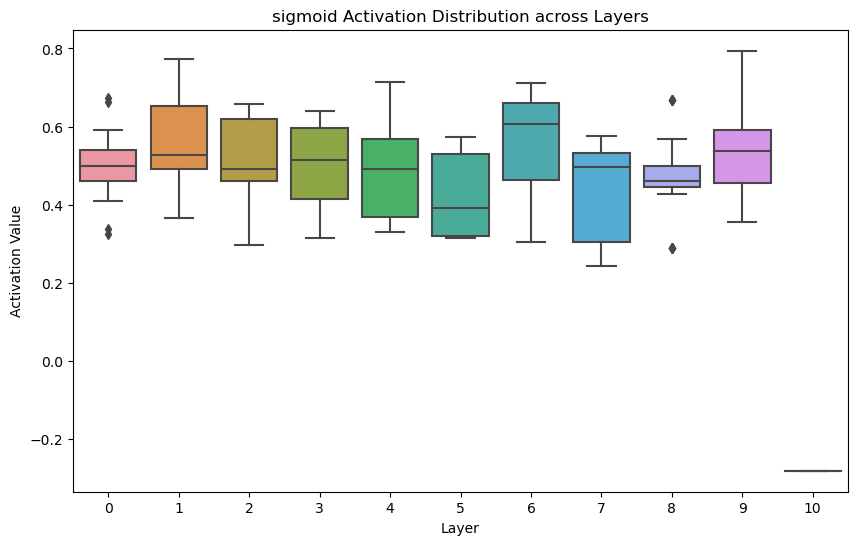

Layer 1 - Mean Activation: 0.5000, Standard Deviation: 0.0725
Layer 2 - Mean Activation: 0.5566, Standard Deviation: 0.1253
Layer 3 - Mean Activation: 0.5169, Standard Deviation: 0.1044
Layer 4 - Mean Activation: 0.4949, Standard Deviation: 0.1068
Layer 5 - Mean Activation: 0.4925, Standard Deviation: 0.1212
Layer 6 - Mean Activation: 0.4232, Standard Deviation: 0.0991
Layer 7 - Mean Activation: 0.5565, Standard Deviation: 0.1302
Layer 8 - Mean Activation: 0.4332, Standard Deviation: 0.1227
Layer 9 - Mean Activation: 0.4744, Standard Deviation: 0.0925
Layer 10 - Mean Activation: 0.5365, Standard Deviation: 0.1233
Layer 11 - Mean Activation: -0.2810, Standard Deviation: 0.0000


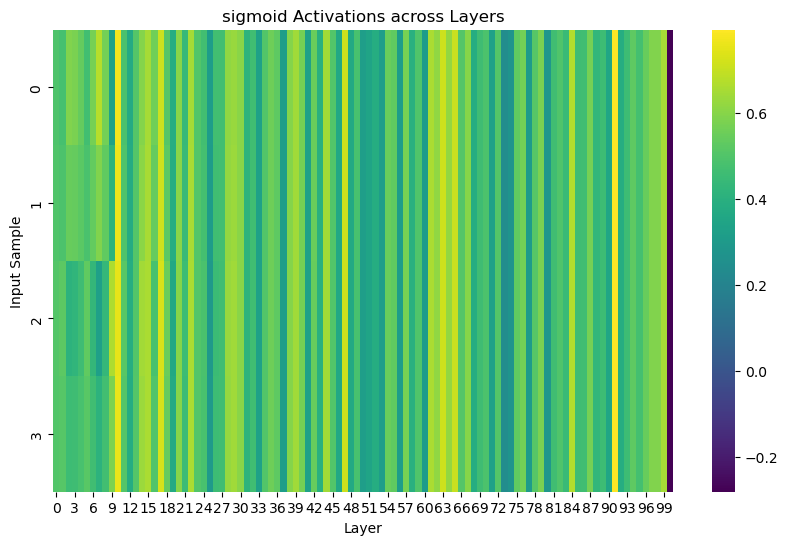

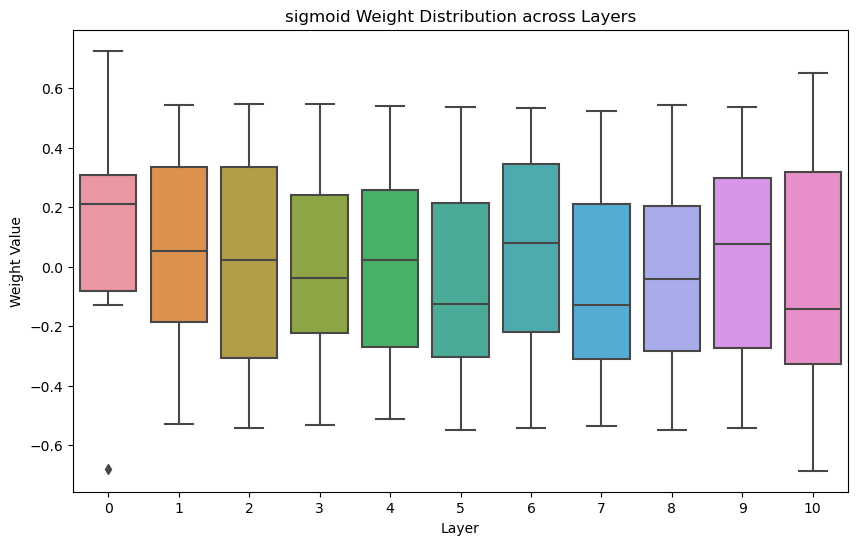

Layer 1 - Mean Weight: 0.1176, Standard Deviation: 0.3576
Layer 2 - Mean Weight: 0.0492, Standard Deviation: 0.3069
Layer 3 - Mean Weight: 0.0261, Standard Deviation: 0.3405
Layer 4 - Mean Weight: -0.0068, Standard Deviation: 0.2987
Layer 5 - Mean Weight: 0.0061, Standard Deviation: 0.3085
Layer 6 - Mean Weight: -0.0622, Standard Deviation: 0.3042
Layer 7 - Mean Weight: 0.0500, Standard Deviation: 0.3245
Layer 8 - Mean Weight: -0.0666, Standard Deviation: 0.3127
Layer 9 - Mean Weight: -0.0312, Standard Deviation: 0.3081
Layer 10 - Mean Weight: 0.0362, Standard Deviation: 0.3165
Layer 11 - Mean Weight: -0.0648, Standard Deviation: 0.4390


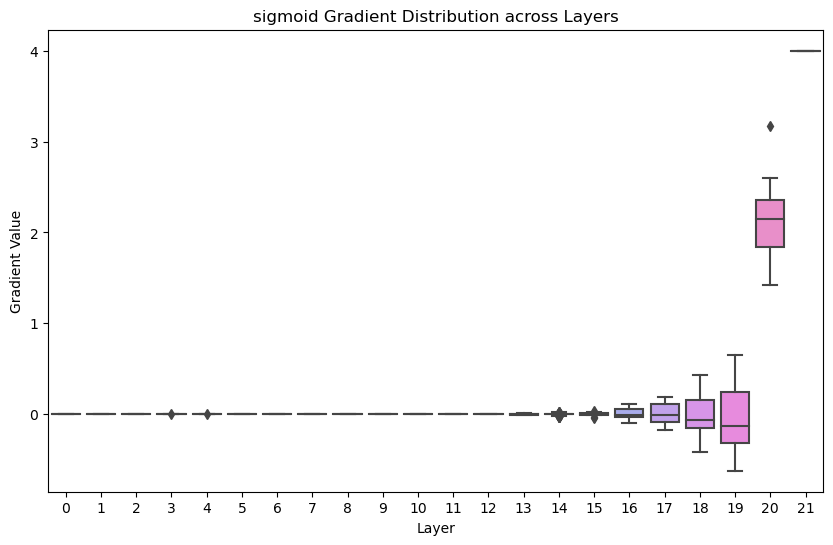

Layer 1 - Mean Gradient: -0.0000, Standard Deviation: 0.0000
Layer 2 - Mean Gradient: -0.0000, Standard Deviation: 0.0000
Layer 3 - Mean Gradient: -0.0000, Standard Deviation: 0.0000
Layer 4 - Mean Gradient: -0.0000, Standard Deviation: 0.0000
Layer 5 - Mean Gradient: 0.0000, Standard Deviation: 0.0000
Layer 6 - Mean Gradient: 0.0000, Standard Deviation: 0.0000
Layer 7 - Mean Gradient: 0.0000, Standard Deviation: 0.0000
Layer 8 - Mean Gradient: 0.0000, Standard Deviation: 0.0001
Layer 9 - Mean Gradient: -0.0001, Standard Deviation: 0.0001
Layer 10 - Mean Gradient: -0.0001, Standard Deviation: 0.0003
Layer 11 - Mean Gradient: 0.0000, Standard Deviation: 0.0006
Layer 12 - Mean Gradient: 0.0000, Standard Deviation: 0.0012
Layer 13 - Mean Gradient: -0.0002, Standard Deviation: 0.0021
Layer 14 - Mean Gradient: -0.0005, Standard Deviation: 0.0049
Layer 15 - Mean Gradient: -0.0008, Standard Deviation: 0.0120
Layer 16 - Mean Gradient: -0.0014, Standard Deviation: 0.0210
Layer 17 - Mean Gradien

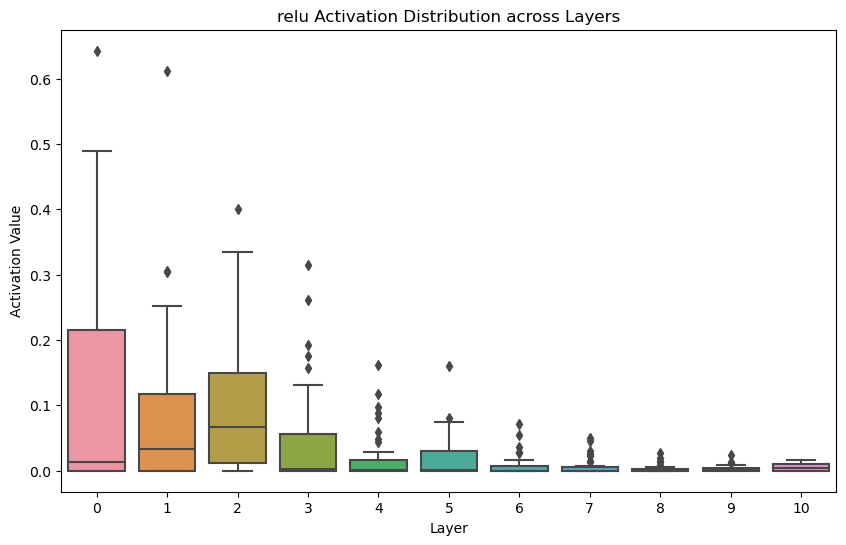

Layer 1 - Mean Activation: 0.1225, Standard Deviation: 0.1688
Layer 2 - Mean Activation: 0.0842, Standard Deviation: 0.1224
Layer 3 - Mean Activation: 0.0994, Standard Deviation: 0.1033
Layer 4 - Mean Activation: 0.0453, Standard Deviation: 0.0765
Layer 5 - Mean Activation: 0.0204, Standard Deviation: 0.0376
Layer 6 - Mean Activation: 0.0190, Standard Deviation: 0.0321
Layer 7 - Mean Activation: 0.0076, Standard Deviation: 0.0154
Layer 8 - Mean Activation: 0.0065, Standard Deviation: 0.0125
Layer 9 - Mean Activation: 0.0030, Standard Deviation: 0.0058
Layer 10 - Mean Activation: 0.0031, Standard Deviation: 0.0047
Layer 11 - Mean Activation: 0.0062, Standard Deviation: 0.0070


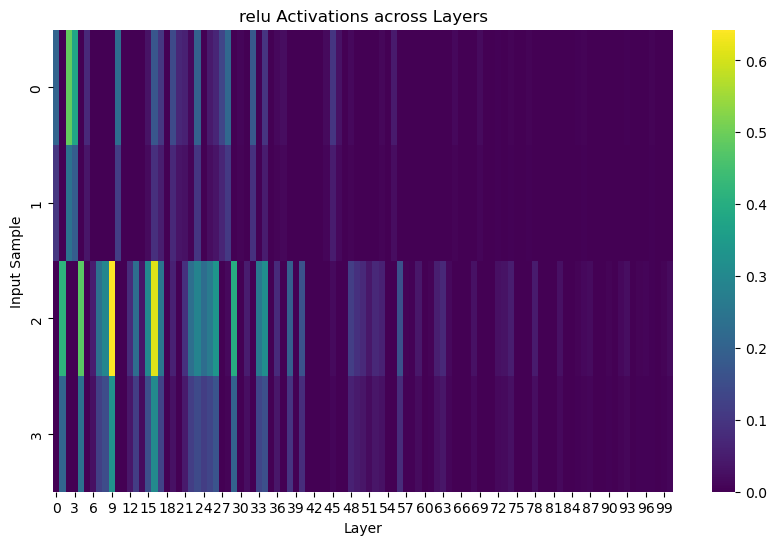

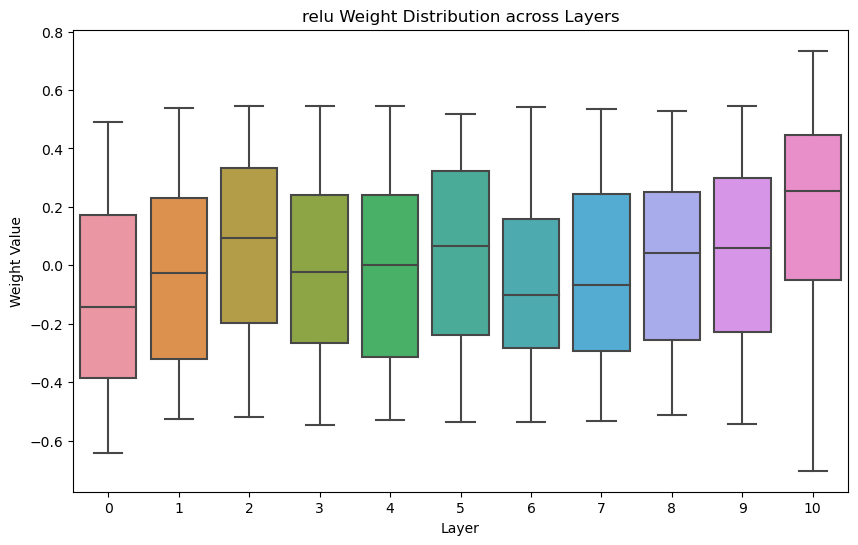

Layer 1 - Mean Weight: -0.0975, Standard Deviation: 0.3601
Layer 2 - Mean Weight: -0.0254, Standard Deviation: 0.3109
Layer 3 - Mean Weight: 0.0543, Standard Deviation: 0.3084
Layer 4 - Mean Weight: -0.0202, Standard Deviation: 0.3215
Layer 5 - Mean Weight: -0.0261, Standard Deviation: 0.3074
Layer 6 - Mean Weight: 0.0320, Standard Deviation: 0.3214
Layer 7 - Mean Weight: -0.0593, Standard Deviation: 0.2885
Layer 8 - Mean Weight: -0.0175, Standard Deviation: 0.3125
Layer 9 - Mean Weight: -0.0010, Standard Deviation: 0.3154
Layer 10 - Mean Weight: 0.0429, Standard Deviation: 0.3039
Layer 11 - Mean Weight: 0.1757, Standard Deviation: 0.3981


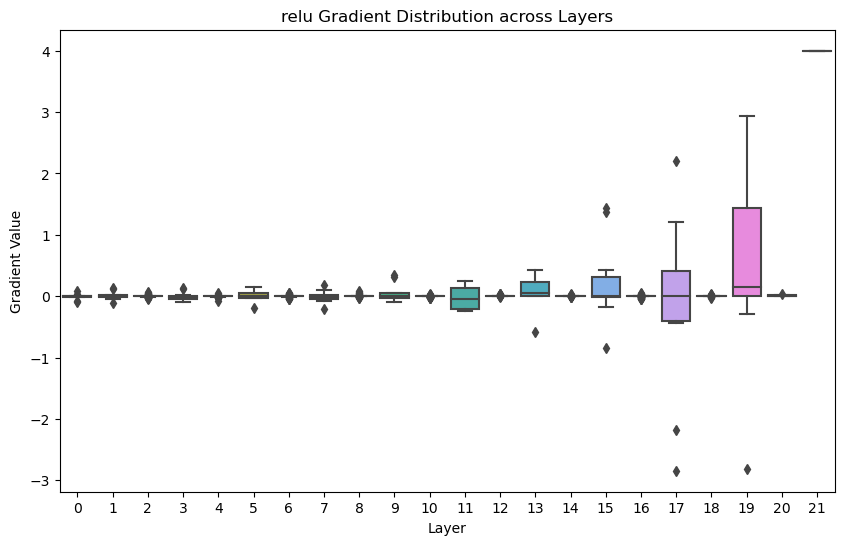

Layer 1 - Mean Gradient: -0.0085, Standard Deviation: 0.0486
Layer 2 - Mean Gradient: 0.0088, Standard Deviation: 0.0652
Layer 3 - Mean Gradient: 0.0003, Standard Deviation: 0.0152
Layer 4 - Mean Gradient: 0.0025, Standard Deviation: 0.0685
Layer 5 - Mean Gradient: 0.0005, Standard Deviation: 0.0135
Layer 6 - Mean Gradient: 0.0049, Standard Deviation: 0.0856
Layer 7 - Mean Gradient: -0.0003, Standard Deviation: 0.0147
Layer 8 - Mean Gradient: -0.0092, Standard Deviation: 0.1014
Layer 9 - Mean Gradient: 0.0028, Standard Deviation: 0.0150
Layer 10 - Mean Gradient: 0.0517, Standard Deviation: 0.1453
Layer 11 - Mean Gradient: -0.0010, Standard Deviation: 0.0097
Layer 12 - Mean Gradient: -0.0225, Standard Deviation: 0.1815
Layer 13 - Mean Gradient: 0.0031, Standard Deviation: 0.0075
Layer 14 - Mean Gradient: 0.0774, Standard Deviation: 0.2670
Layer 15 - Mean Gradient: 0.0011, Standard Deviation: 0.0057
Layer 16 - Mean Gradient: 0.2205, Standard Deviation: 0.6635
Layer 17 - Mean Gradient: -0

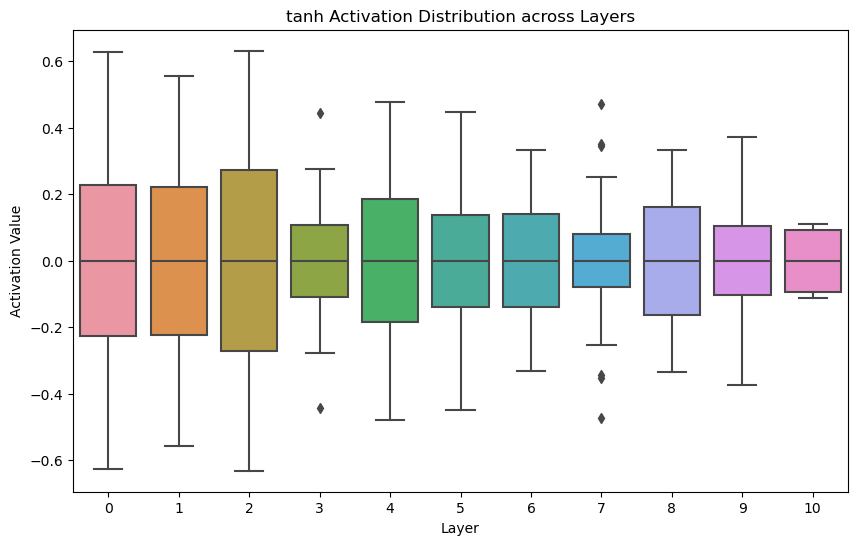

Layer 1 - Mean Activation: 0.0000, Standard Deviation: 0.3027
Layer 2 - Mean Activation: 0.0000, Standard Deviation: 0.2787
Layer 3 - Mean Activation: 0.0000, Standard Deviation: 0.3277
Layer 4 - Mean Activation: 0.0000, Standard Deviation: 0.1693
Layer 5 - Mean Activation: 0.0000, Standard Deviation: 0.2395
Layer 6 - Mean Activation: 0.0000, Standard Deviation: 0.2056
Layer 7 - Mean Activation: 0.0000, Standard Deviation: 0.1739
Layer 8 - Mean Activation: 0.0000, Standard Deviation: 0.1747
Layer 9 - Mean Activation: 0.0000, Standard Deviation: 0.1968
Layer 10 - Mean Activation: 0.0000, Standard Deviation: 0.1691
Layer 11 - Mean Activation: 0.0000, Standard Deviation: 0.0999


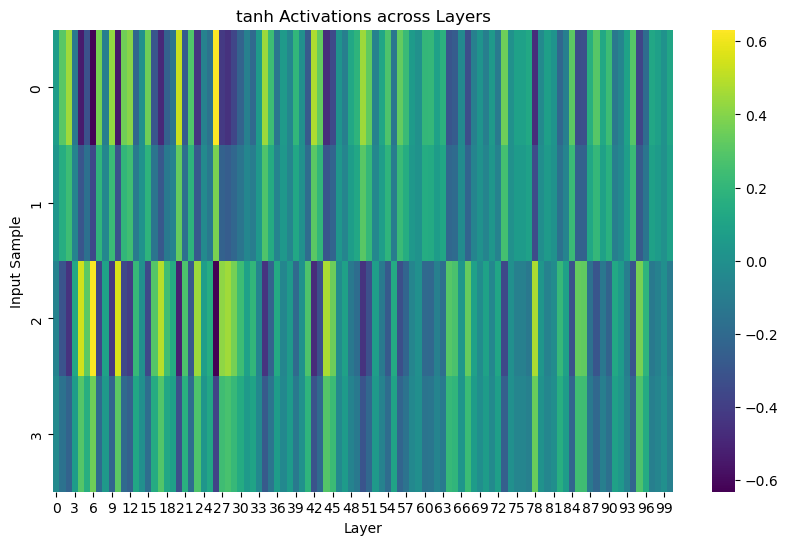

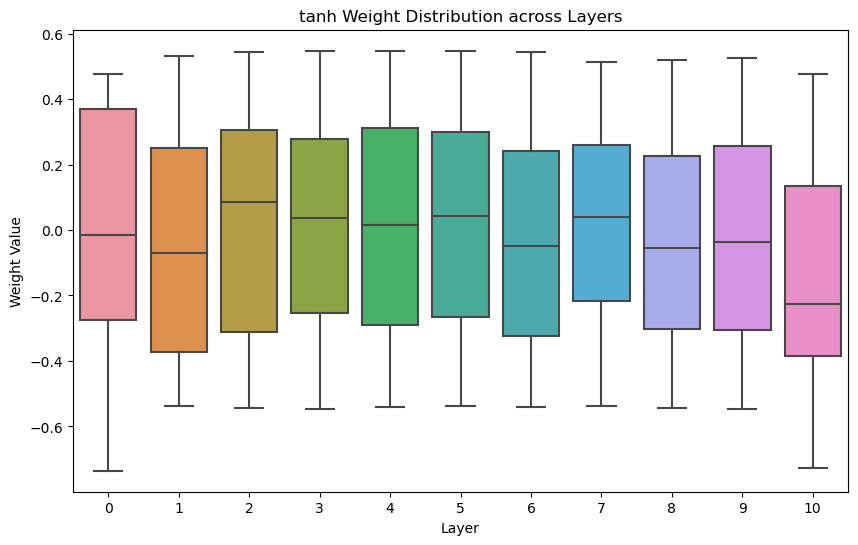

Layer 1 - Mean Weight: -0.0187, Standard Deviation: 0.4154
Layer 2 - Mean Weight: -0.0508, Standard Deviation: 0.3272
Layer 3 - Mean Weight: 0.0235, Standard Deviation: 0.3414
Layer 4 - Mean Weight: 0.0175, Standard Deviation: 0.3219
Layer 5 - Mean Weight: 0.0121, Standard Deviation: 0.3326
Layer 6 - Mean Weight: 0.0248, Standard Deviation: 0.3303
Layer 7 - Mean Weight: -0.0363, Standard Deviation: 0.3253
Layer 8 - Mean Weight: 0.0087, Standard Deviation: 0.3063
Layer 9 - Mean Weight: -0.0341, Standard Deviation: 0.3115
Layer 10 - Mean Weight: -0.0160, Standard Deviation: 0.3153
Layer 11 - Mean Weight: -0.1405, Standard Deviation: 0.3495


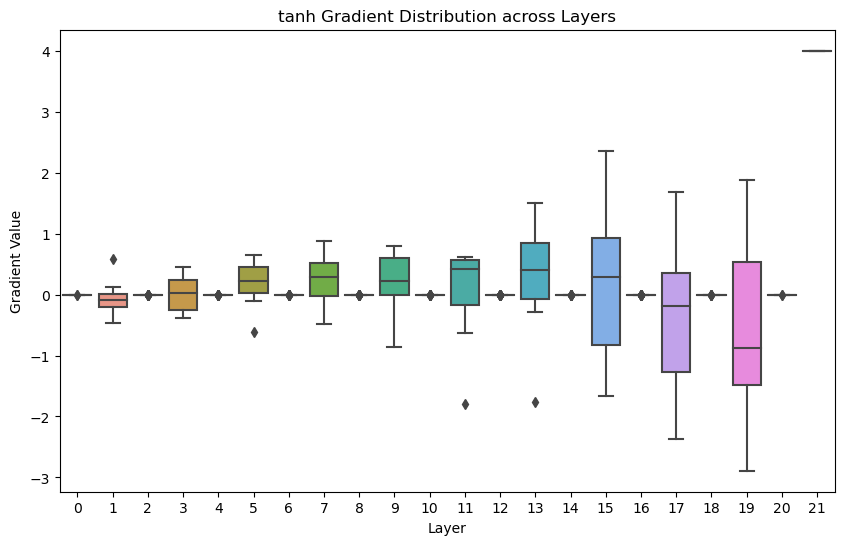

Layer 1 - Mean Gradient: 0.0000, Standard Deviation: 0.0000
Layer 2 - Mean Gradient: -0.0549, Standard Deviation: 0.2619
Layer 3 - Mean Gradient: -0.0000, Standard Deviation: 0.0000
Layer 4 - Mean Gradient: 0.0144, Standard Deviation: 0.2913
Layer 5 - Mean Gradient: -0.0000, Standard Deviation: 0.0000
Layer 6 - Mean Gradient: 0.1828, Standard Deviation: 0.3485
Layer 7 - Mean Gradient: 0.0000, Standard Deviation: 0.0000
Layer 8 - Mean Gradient: 0.2514, Standard Deviation: 0.3983
Layer 9 - Mean Gradient: 0.0000, Standard Deviation: 0.0000
Layer 10 - Mean Gradient: 0.1509, Standard Deviation: 0.5635
Layer 11 - Mean Gradient: 0.0000, Standard Deviation: 0.0000
Layer 12 - Mean Gradient: 0.0530, Standard Deviation: 0.7302
Layer 13 - Mean Gradient: -0.0000, Standard Deviation: 0.0000
Layer 14 - Mean Gradient: 0.2709, Standard Deviation: 0.8618
Layer 15 - Mean Gradient: -0.0000, Standard Deviation: 0.0000
Layer 16 - Mean Gradient: 0.1960, Standard Deviation: 1.2923
Layer 17 - Mean Gradient: -0

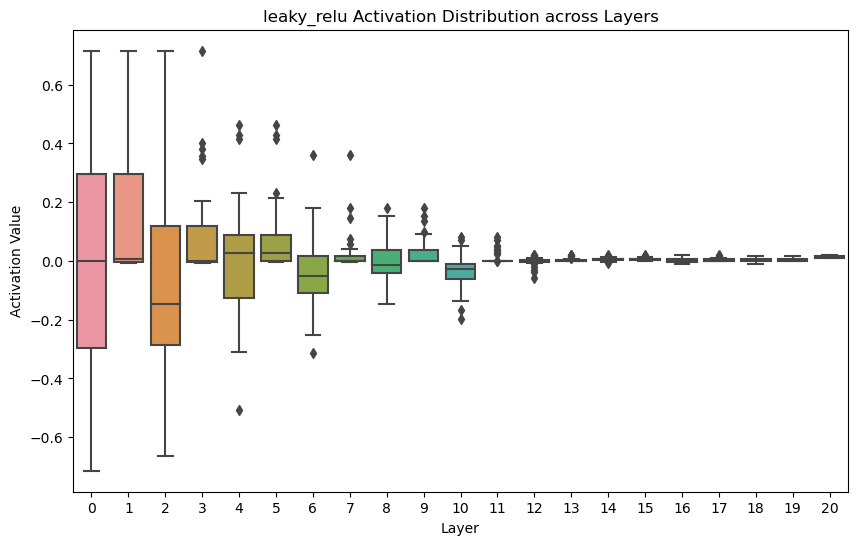

Layer 1 - Mean Activation: -0.0000, Standard Deviation: 0.3718
Layer 2 - Mean Activation: 0.1540, Standard Deviation: 0.2131
Layer 3 - Mean Activation: -0.0874, Standard Deviation: 0.2933
Layer 4 - Mean Activation: 0.0818, Standard Deviation: 0.1579
Layer 5 - Mean Activation: 0.0008, Standard Deviation: 0.2019
Layer 6 - Mean Activation: 0.0778, Standard Deviation: 0.1223
Layer 7 - Mean Activation: -0.0468, Standard Deviation: 0.1192
Layer 8 - Mean Activation: 0.0244, Standard Deviation: 0.0659
Layer 9 - Mean Activation: -0.0032, Standard Deviation: 0.0734
Layer 10 - Mean Activation: 0.0262, Standard Deviation: 0.0467
Layer 11 - Mean Activation: -0.0343, Standard Deviation: 0.0588
Layer 12 - Mean Activation: 0.0090, Standard Deviation: 0.0208
Layer 13 - Mean Activation: -0.0016, Standard Deviation: 0.0142
Layer 14 - Mean Activation: 0.0032, Standard Deviation: 0.0056
Layer 15 - Mean Activation: 0.0051, Standard Deviation: 0.0052
Layer 16 - Mean Activation: 0.0056, Standard Deviation: 0.

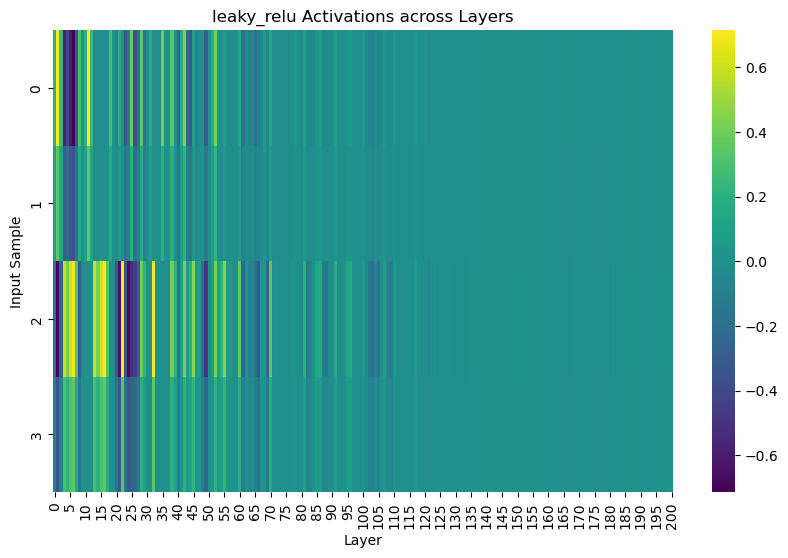

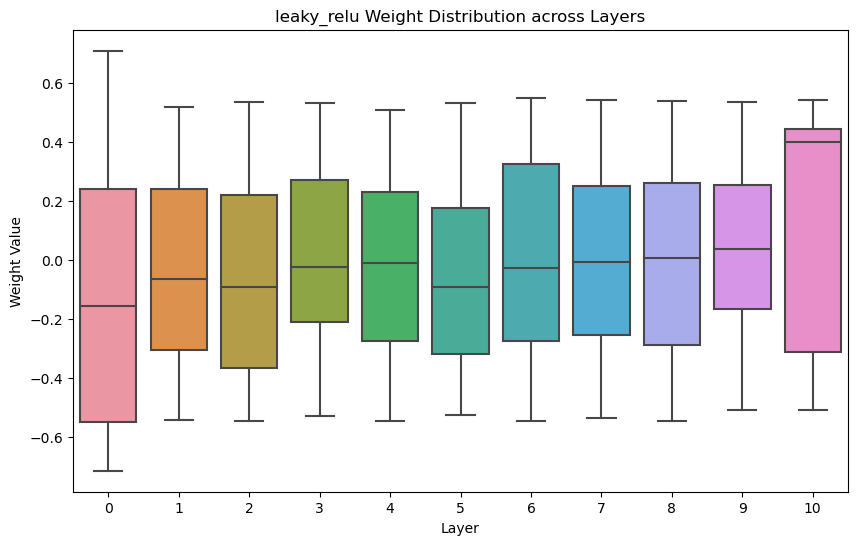

Layer 1 - Mean Weight: -0.1183, Standard Deviation: 0.4552
Layer 2 - Mean Weight: -0.0331, Standard Deviation: 0.3074
Layer 3 - Mean Weight: -0.0589, Standard Deviation: 0.3314
Layer 4 - Mean Weight: 0.0073, Standard Deviation: 0.2916
Layer 5 - Mean Weight: -0.0209, Standard Deviation: 0.3104
Layer 6 - Mean Weight: -0.0508, Standard Deviation: 0.3059
Layer 7 - Mean Weight: 0.0169, Standard Deviation: 0.3282
Layer 8 - Mean Weight: -0.0007, Standard Deviation: 0.3055
Layer 9 - Mean Weight: 0.0031, Standard Deviation: 0.3373
Layer 10 - Mean Weight: 0.0250, Standard Deviation: 0.2969
Layer 11 - Mean Weight: 0.1371, Standard Deviation: 0.4251


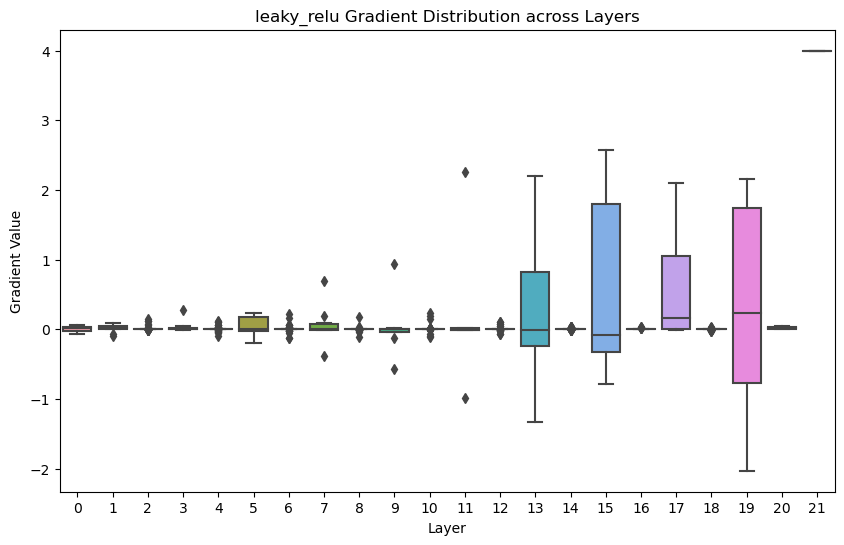

Layer 1 - Mean Gradient: 0.0066, Standard Deviation: 0.0401
Layer 2 - Mean Gradient: 0.0153, Standard Deviation: 0.0516
Layer 3 - Mean Gradient: 0.0059, Standard Deviation: 0.0252
Layer 4 - Mean Gradient: 0.0349, Standard Deviation: 0.0819
Layer 5 - Mean Gradient: 0.0041, Standard Deviation: 0.0270
Layer 6 - Mean Gradient: 0.0434, Standard Deviation: 0.1374
Layer 7 - Mean Gradient: 0.0041, Standard Deviation: 0.0351
Layer 8 - Mean Gradient: 0.0598, Standard Deviation: 0.2522
Layer 9 - Mean Gradient: 0.0004, Standard Deviation: 0.0221
Layer 10 - Mean Gradient: 0.0228, Standard Deviation: 0.3509
Layer 11 - Mean Gradient: 0.0033, Standard Deviation: 0.0382
Layer 12 - Mean Gradient: 0.1271, Standard Deviation: 0.7679
Layer 13 - Mean Gradient: 0.0027, Standard Deviation: 0.0218
Layer 14 - Mean Gradient: 0.2882, Standard Deviation: 1.0016
Layer 15 - Mean Gradient: 0.0018, Standard Deviation: 0.0081
Layer 16 - Mean Gradient: 0.5457, Standard Deviation: 1.2548
Layer 17 - Mean Gradient: 0.0035,

In [2]:
import os
import warnings
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, LeakyReLU

# Suppress TensorFlow logs and Python warnings for clearer output
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings("ignore")

def create_network(activation, layers, units, output_units):
    """ 
    Create a neural network model based on the given activation function.
    """
    model = tf.keras.Sequential()
    
    for _ in range(layers):
        if activation == 'leaky_relu':
            model.add(Dense(units))
            model.add(LeakyReLU(alpha=0.01))
        else:
            model.add(Dense(units, activation=activation))
            
    model.add(Dense(output_units))
    model.build(input_shape=(None, 1))
    return model

def get_activations_for_model(model, data):
    """
    Extract activations for the given data.
    """
    return [tf.keras.Model(inputs=model.input, outputs=layer.output).predict(data, verbose=0) for layer in model.layers]

def get_weights_for_model(model):
    """
    Extract weights from the model.
    """
    return [layer.get_weights()[0] for layer in model.layers if layer.get_weights()]

def compute_gradients(model, data):
    """
    Compute gradients for the given data.
    """
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(data)
        predictions = model(data)
    
    gradient_input = tape.gradient(predictions, data)
    gradient_weights = []
    
    for layer in model.layers:
        weights = layer.trainable_weights  # Ensure we only consider trainable weights
        if weights:
            gradients = tape.gradient(predictions, weights)
            gradient_weights.extend(gradients)
    
    return gradient_input, gradient_weights


def plot_activations(activation_type, model, data):
    """
    Plot activations for the given model and data.
    """
    activations = get_activations_for_model(model, data)
    for idx, activation in enumerate(activations):
        plt.figure(figsize=(6, 4))
        plt.hist(activation, bins=50)
        plt.title(f"{activation_type} Activations in Layer {idx+1}")
        plt.xlabel("Activation Value")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

def plot_weights(activation_type, model):
    """
    Plot weight distributions for the given model.
    """
    weights = get_weights_for_model(model)
    for idx, weight in enumerate(weights):
        plt.figure(figsize=(6, 4))
        plt.hist(weight.flatten(), bins=50)
        plt.title(f"{activation_type} Weights in Layer {idx+1}")
        plt.xlabel("Weight Value")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

def plot_gradients(activation_type, model, data):
    """
    Plot gradients for the given model and data.
    """
    _, gradient_weights = compute_gradients(model, data)
    fig, axes = plt.subplots(1, len(gradient_weights), figsize=(6 * len(gradient_weights), 4))
    for idx, gradient in enumerate(gradient_weights):
        if len(gradient_weights) > 1:
            ax = axes[idx]
        else:
            ax = axes
        ax.hist(gradient.numpy().flatten(), bins=50)
        ax.set_title(f"{activation_type} Gradients in Layer {idx+1}")
        ax.set_xlabel("Gradient Value")
        ax.set_ylabel("Frequency")
        ax.grid(True)
    plt.tight_layout()
    plt.show()

def plot_summary(data_list, title, data_type):
    """
    Plot boxplots and summary statistics for activations, weights, or gradients.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    if isinstance(data_list[0], tf.Tensor):  # Check if the data is still in tensor format
        sns.boxplot(data=[d.numpy().flatten() for d in data_list], ax=ax)
    else:
        sns.boxplot(data=[d.flatten() for d in data_list], ax=ax)  # For numpy arrays
    ax.set_title(f"{title} {data_type} Distribution across Layers")
    ax.set_xlabel("Layer")
    ax.set_ylabel(f"{data_type} Value")
    plt.show()

    # Display summary statistics
    for idx, data in enumerate(data_list):
        if isinstance(data, tf.Tensor):  # Check if the data is still in tensor format
            mean_val = np.mean(data.numpy())
            std_val = np.std(data.numpy())
        else:
            mean_val = np.mean(data)
            std_val = np.std(data)
        print(f"Layer {idx+1} - Mean {data_type}: {mean_val:.4f}, Standard Deviation: {std_val:.4f}")

def plot_activations_heatmap(activation_type, model, data):
    """
    Plot heatmap for activations across layers for multiple inputs.
    """
    activations = get_activations_for_model(model, data)
    
    # Check if activations are in tensor format or numpy arrays
    if isinstance(activations[0], tf.Tensor):
        activations_matrix = np.hstack([act.numpy() for act in activations])
    else:
        activations_matrix = np.hstack(activations)  # Directly stack if already numpy arrays
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(activations_matrix, cmap='viridis', cbar=True)
    plt.title(f"{activation_type} Activations across Layers")
    plt.xlabel("Layer")
    plt.ylabel("Input Sample")
    plt.show()

def analyze_networks(models, data):
    """
    Analyze activations, weights, and gradients for all models.
    """
    for activation_type, model in models.items():
        print(f"\nAnalysis for {activation_type.upper()} Activation\n{'-'*40}")
        
        activations = get_activations_for_model(model, data)
        plot_summary(activations, activation_type, "Activation")
        plot_activations_heatmap(activation_type, model, data)

        weights = get_weights_for_model(model)
        plot_summary(weights, activation_type, "Weight")

        _, gradient_weights = compute_gradients(model, data)
        plot_summary(gradient_weights, activation_type, "Gradient")

        print("\n\n")

# Test the functions
ACTIVATIONS = ['sigmoid', 'relu', 'tanh', 'leaky_relu']
models_dict = {activation: create_network(activation, 10, 10, 1) for activation in ACTIVATIONS}
data_batch = tf.constant([[1.0], [0.5], [-1.0], [-0.5]])
analyze_networks(models_dict, data_batch)


# Why Leaky ReLU exhibits a distinct behavior?

- **No Zero Slope**: Unlike standard ReLU, Leaky ReLU retains a small gradient for negative inputs. This prevents 'dead neurons' – neurons that never activate.
  
- **Deep Networks**: Activation functions' effects intensify in deep networks. For sigmoid, gradients can vanish in deep layers due to minuscule gradient values. Standard ReLU's gradients can vanish for negative inputs or stay consistent for positive ones. However, Leaky ReLU's gradient remains slightly positive for negative inputs. __In deeper layers, these minute gradients can compound, resulting in significant activations__.

- **Initialization**: The manner in which weights and biases are initialized can sway activation behaviors. If initial conditions push Leaky ReLU's activations mostly towards negative values, growing network depth might amplify these activations, especially if negative values consistently pass through Leaky ReLU.

- **Network Design**: The overall architecture, encompassing neuron count, layer structure, and inter-neuronal connections, can modulate activation behaviors. Certain designs might amplify or suppress activations.

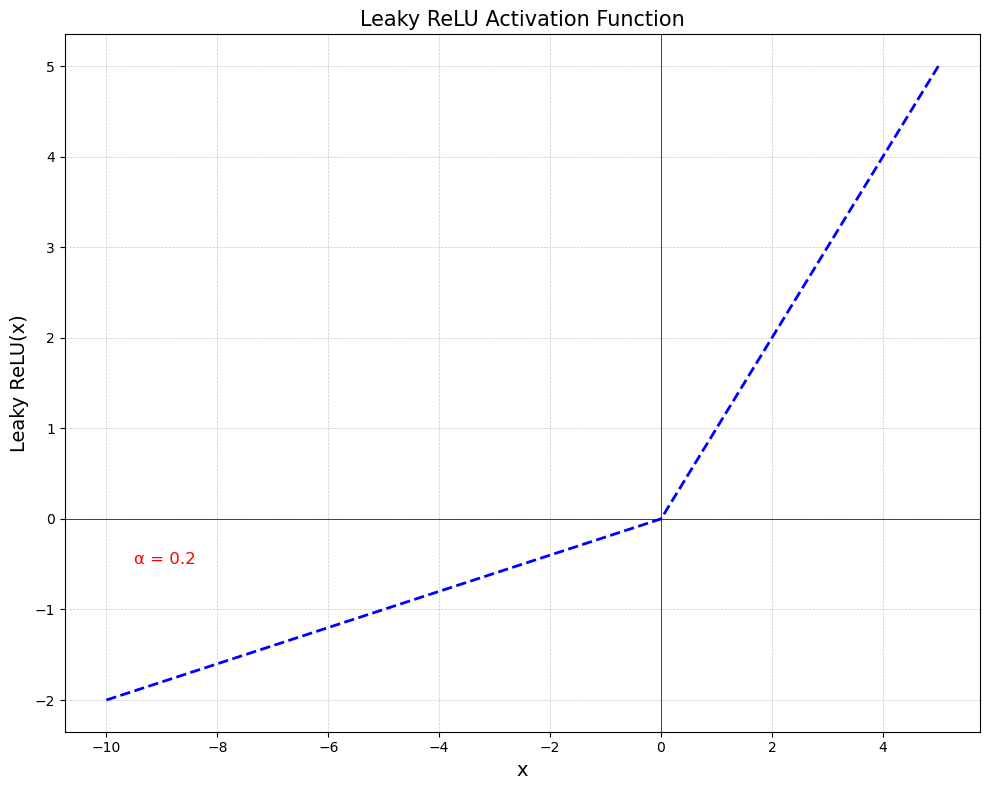

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def updated_leaky_relu_plot(alpha=0.2):
    # Define x range
    x = np.linspace(-10, 5, 600)

    # Compute Leaky ReLU values
    y = leaky_relu(x, alpha=alpha)

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.plot(x, y, 'b--', linewidth=2)  # Dashed line style
    plt.title('Leaky ReLU Activation Function', fontsize=15)
    plt.xlabel('x', fontsize=14)
    plt.ylabel('Leaky ReLU(x)', fontsize=14)  # Updated y-label
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)  # Updated grid style
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    # Annotate the value of alpha
    plt.annotate(f'α = {alpha}', xy=(-9.5, -0.5), color='red', fontsize=12)

    plt.tight_layout()
    plt.show()

# Generate the updated plot
updated_leaky_relu_plot()

### Leaky ReLU introduces a slight slope for negative inputs, preventing neurons from becoming inactive, thus addressing the 'dying ReLU' problem in deep networks.
---
- **Positive Inputs**: Demonstrates linear behavior $f(x) = x$, facilitating unhindered gradient flow.
- **Negative Inputs**: Not flat like standard ReLU; has a slight slope, typically 0.01, determined by the $ \alpha $ parameter. Here, $\alpha = 0.2$.
- **Dead Neuron Mitigation**: The minimal slope ensures neurons remain active.
- **Continuity**: Leaky ReLU is continuous, but non-smooth at $ x=0$.
- **Extremal Behavior**: As $x$ tends to $ \pm \infty $, the function behavior is linear or gradually declining.

---


<h1 id="credits" style="color: #4CAF50;">🥇 Credits ⤵︎ </h1>
<h4 style="color: #2196F3;">For more information, visit the works of:</h4>
<ul style="list-style-type: square;">
  <li><a href="https://arxiv.org/pdf/2109.14545.pdf">Dubey, Singh, Chaudhuri. Activation Functions in Deep Learning: A Comprehensive Survey and Benchmark. Neurocomputing, 2021.</a></li>
  <li><a href="https://github.com/shivram1987/ActivationFunctions">GitHub: ActivationFunctions</a></li>
  <li><a href="https://medium.com/geekculture/different-activation-functions-for-deep-neural-networks-you-should-know-ea5e86f51e84">Medium: Different Activation Functions for Deep Neural Networks</a></li>
  <li><a href="https://www.kaggle.com/code/mpwolke/nn-activation-functions-choreography">@mpwolke's NN Activation Functions Choreography notebook 🩰</a></li>
  <li><a href="https://www.kaggle.com/code/samuelcortinhas/mish-a-self-regularized-activation-function-tf">@samuelcortinhas's Mish: A Self Regularized Activation Function notebook</a></li>
</ul>


<div style="background-color: #f2f2f2; padding: 53px; border-radius: 5px;">
  <h3>If you found this notebook helpful...</h3>
  <p>
  Please consider giving it a star. Your support helps me continue to develop high-quality code and pursue my career as a data analyst/engineer. Feedback is always welcome and appreciated. Thank you for taking the time to read my work! 
  </p> 
  <h4>
  <p style="text-align: right;">
  <a href="https://github.com/patmejia"> - pat [¬º-°]¬ </a>
  </h4>
  </p>
</div>